Hunter S. DiCicco

DS440-002: Data Science Capstone

Dr. Rigas, for Drs. Niki and Paris Von Lockette

# Exploratory Data Analysis
## Round 1: Initial impressions, Problem Areas

In [1]:
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import numpy as np

In [2]:
print(f"Last Updated On: {datetime.datetime.now()!s}")

Last Updated On: 2020-04-05 23:52:53.888987


In [3]:
czc = pd.read_csv("../project/volume/data/raw/czchar.csv",
                  skiprows=list(range(5)) + [7], # the first few rows contain human-readable title + informative paragraphs
                  header=1) # 0-indexed row 6 is the header

ipums = pd.read_stata('../project/volume/data/raw/ipums_met_arr_sch_100K.dta')

czc.head()

,CZ,CZ Name,State,Census 2000 population,Urban Areas,Frac. Black,Racial Segregation,Income Segregation,Segregation of Poverty (<p25),Segregation of Affluence (>p75),...,Migration Inflow Rate,Migration Outlflow Rate,Frac. Foreign Born,Social Capital Index,Fraction Religious,Violent Crime Rate,Fraction of Children with Single Mothers,Fraction of Adults Divorced,Fraction of Adults Married,Income Growth 2000-2006/10
0,100,Johnson City,TN,"576,081",1,0.021,0.090,0.035,0.030,0.038,...,0.006,0.005,0.012,-0.298,0.514,0.001,0.190,0.110,0.601,-0.002
1,200,Morristown,TN,"227,816",1,0.020,0.093,0.026,0.028,0.025,...,0.016,0.014,0.023,-0.767,0.544,0.002,0.185,0.116,0.613,-0.002
2,301,Middlesborough,TN,"66,708",0,0.015,0.064,0.024,0.015,0.026,...,0.008,0.012,0.007,-1.270,0.668,0.001,0.211,0.113,0.590,-0.004
3,302,Knoxville,TN,"727,600",1,0.056,0.210,0.092,0.084,0.102,...,0.016,0.014,0.020,-0.222,0.602,0.001,0.206,0.114,0.575,-0.002
4,401,Winston-Salem,NC,"493,180",1,0.174,0.262,0.072,0.061,0.081,...,0.022,0.019,0.053,-0.018,0.488,0.003,0.220,0.092,0.586,-0.014


In [4]:
ipums.head()

,year,metarea,metaread,met2013,race,multyear,datanum,serial,cbserial,hhwt,...,imputed_networth_1980,imputed_round_1980,matched_to_scf_1980,metro_dissimilarity_wb,metro_isolation_b,in_metro_seg,arrests,in_arrests,school_msa_dissimilarity,in_school_seg
0,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,856.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
1,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1086.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
2,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1094.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
3,1960.0,288.0,2880.0,NaN,1.0,NaN,2.0,1338.0,NaN,20.0,...,NaN,NaN,NaN,62.133867,32.34385,1.0,237.0,1.0,NaN,0.0
4,1960.0,860.0,8600.0,NaN,1.0,NaN,2.0,2097.0,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,0.0,171.0,1.0,NaN,0.0


Some important notes on these features:

* Social Capital Index:  Standardized index combining measures of
    * voter turnout rates, 
    * fraction of people who return their census forms,
    * measures of participation in community organizations


* Gini: Under Income Inequality, [Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient); $G=\frac{A}{A+B}$ of the labeled areas below
    * computed using parents of children in the core sample
    * with income topcoded at \$100 million in 2012 dollars

<img src="../res/Gini_coefficient.png" alt="Gini Coefficient Visualization" width="400" style="background-color:#e2cb70;" align="left"/>

Gini appears to be a robust predictor – attempt to explain variance in innovation using Gini index?

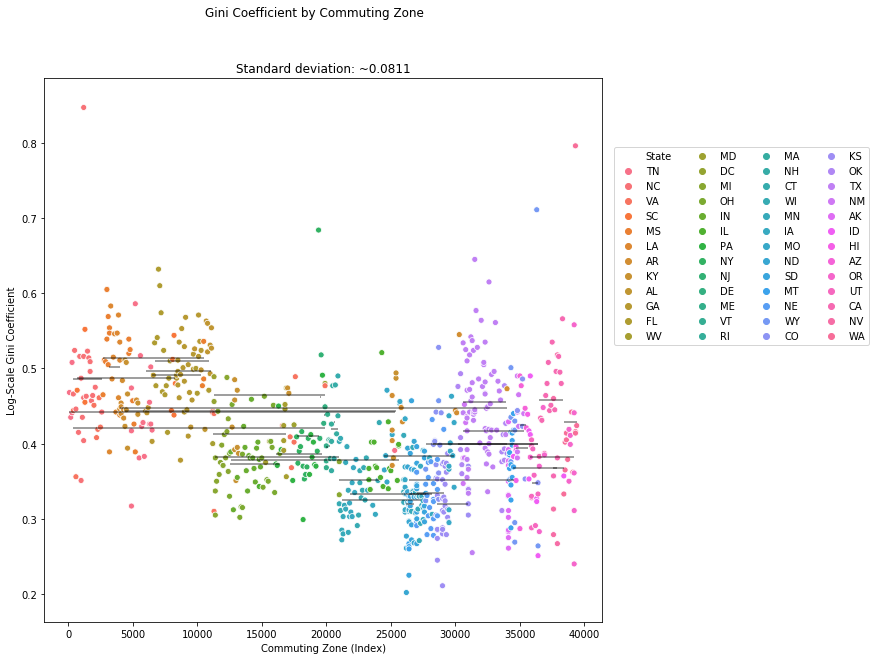

In [5]:
czc2 = czc.sort_values(axis=0, by=['CZ', 'State'])
groups = czc2.groupby(['State'])
means = groups['Gini'].mean().values
mincz = groups['CZ'].min().values
maxcz = groups['CZ'].max().values

fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="CZ", y="Gini", hue="State",
                     #legend=False,
                     data=czc2);
ax.legend(loc='lower center', bbox_to_anchor=(1.25, 0.5), ncol=4)
plt.hlines(means, mincz, maxcz, alpha=0.5)
plt.xlabel("Commuting Zone (Index)");
plt.ylabel("Log-Scale Gini Coefficient");
plt.suptitle("Gini Coefficient by Commuting Zone");
plt.title(f"Standard deviation: ~{np.round(np.std(czc2['Gini']), 4)!s}");

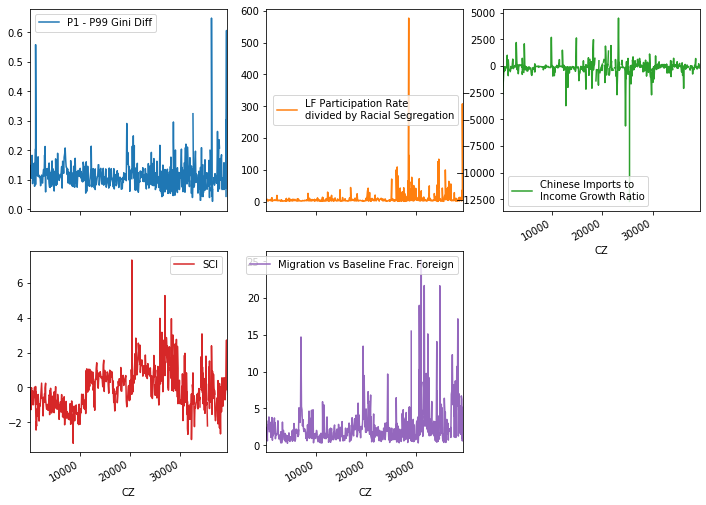

In [32]:
czc2['gini diff'] = czc2['Gini'] - czc2['Gini Bottom 99%']
czc2['gini diff'].apply(np.abs)
czc2['lfpr/rs'] = czc2['Labor Force Participation Rate']/czc2['Racial Segregation']
czc2['chi/inc'] = czc2['Growth in Chinese Imports 1990-2000']/czc2['Income Growth 2000-2006/10']
czc2['migration diff'] = czc2['Frac. Foreign Born']/czc2['Migration Outlflow Rate']
ax = czc2.plot.line('CZ',
                    ['gini diff',
                     'lfpr/rs',
                     'chi/inc',
                     'Social Capital Index',
                     'migration diff'],
                    subplots=True, layout=(3,3),
                    #legend='reverse',
                    figsize=(12,14),
                    label=('P1 - P99 Gini Diff',
                           'LF Participation Rate\ndivided by Racial Segregation',
                           'Chinese Imports to\nIncome Growth Ratio',
                           'SCI',
                           'Migration vs Baseline Frac. Foreign')
              );